In [13]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(RColorBrewer)

In [2]:
df <- read_csv('data/supermarket_sales_clean.csv')

# wrangling into factors so that we can change the order in graphs
df <- mutate_at(df, vars(`Branch`, `City`, `Gender`, `Customer type`, `Product line`, 
                         `Day_of_week`, `Time_of_day`), as.factor)

df$Day_of_week <- df$Day_of_week %>%
    fct_relevel("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

df$Time_of_day <- df$Time_of_day %>%
    fct_relevel("Evening", "Afternoon", "Morning")

Parsed with column specification:
cols(
  Date_time = col_datetime(format = ""),
  `Invoice ID` = col_character(),
  Branch = col_character(),
  City = col_character(),
  `Customer type` = col_character(),
  Gender = col_character(),
  `Product line` = col_character(),
  `Unit price` = col_double(),
  Quantity = col_double(),
  `Tax 5%` = col_double(),
  Total = col_double(),
  Payment = col_character(),
  cogs = col_double(),
  `gross margin percentage` = col_double(),
  `gross income` = col_double(),
  Rating = col_double(),
  Day_of_week = col_character(),
  Time_of_day = col_character()
)


In [5]:
options(repr.plot.width=8, repr.plot.height=4)

In [32]:
make_heat_map <- function(branch, title, col_title, func) {
    df %>%
        filter(Branch == branch) %>%
        group_by(Day_of_week, Time_of_day) %>%
        summarize(col_title = {{func}}) %>%
        ggplot(aes(x = Day_of_week, y = Time_of_day, fill = col_title)) +
            geom_tile() +
            scale_fill_distiller(palette = "Greens", direction = 1) +
            ggtitle(title) +
            labs(x = "", y = "", fill = "")
}

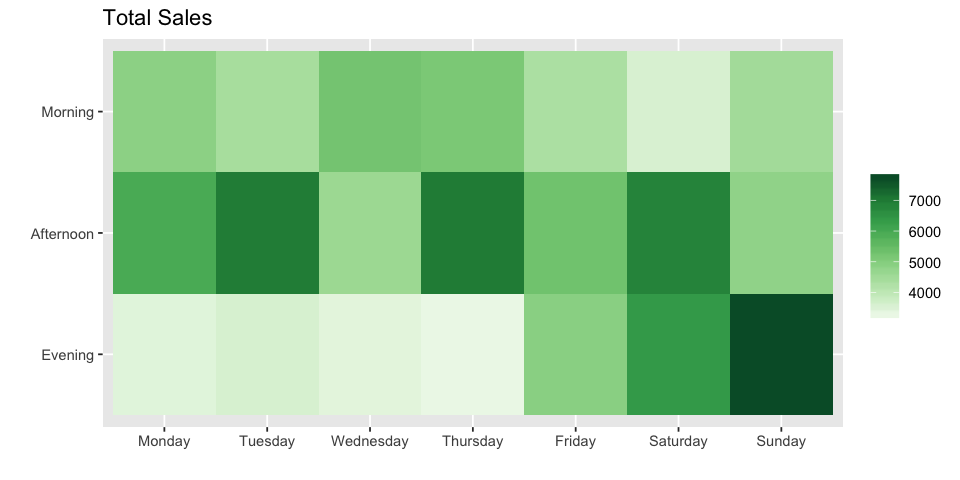

In [33]:
# total sales
make_heat_map("A", "Total Sales", total_sales, sum(Total))

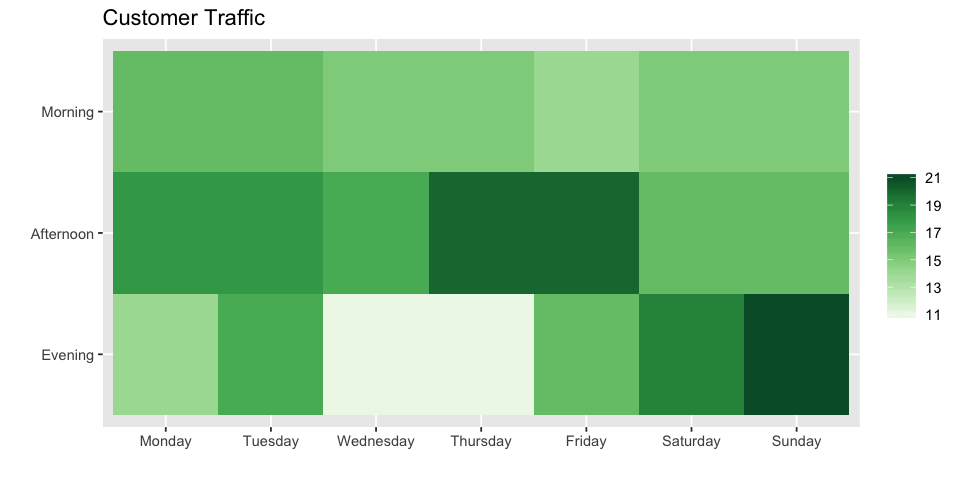

In [38]:
# customer traffic
make_heat_map("A", "Customer Traffic", traffic, n())

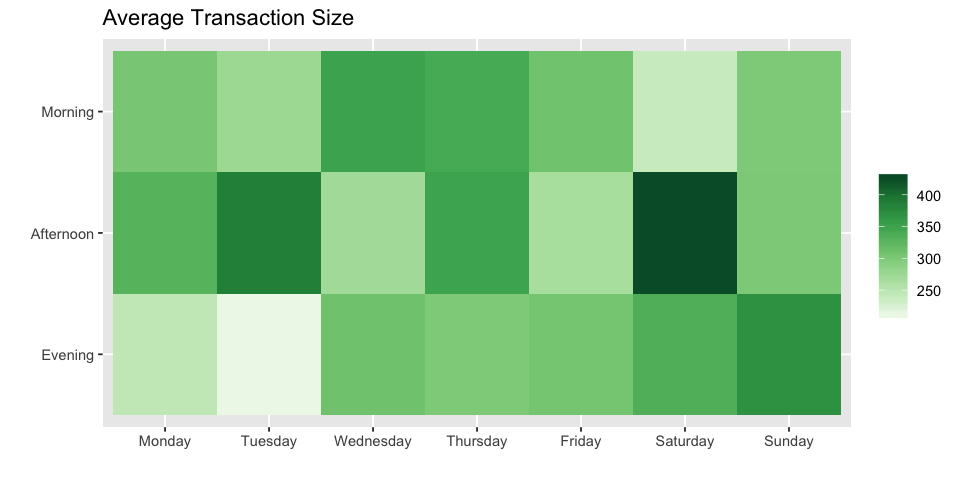

In [39]:
# avg transaction size
make_heat_map("A", "Average Transaction Size", trxn_size, sum(Total) / n())

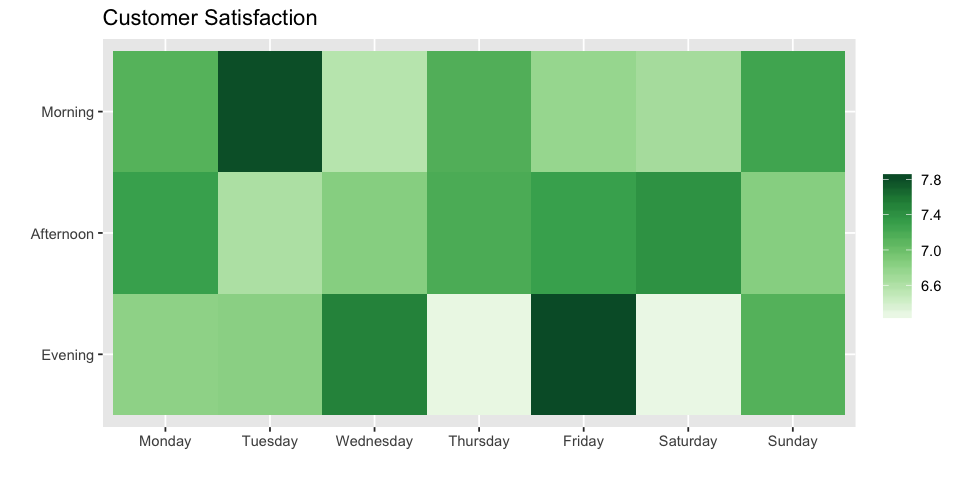

In [40]:
# avg customer satisfaction
make_heat_map("A", "Customer Satisfaction", cust_sat, mean(Rating))